# Lab 5 - Part 1 & 2

### Objectives:
Radar to detect objects and people in 3D using radar point cloud data.


### Components needed:
TI radar, laptop with usb port, corner reflectors


In [2]:
from kmeans import *
#from sklearn.cluster import kmeans
# import required libraries
import struct
import sys
import serial
import binascii
import time
import numpy as np
import math

import os
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs


# Local File Imports
from parse_bin_output import *

## Exercise 1: Radar point cloud data

In this section, you will be working with radar point cloud data using TI IWRL6432BOOST.

Open Visualizer (same as what you've done in lab 4), and check "save UART" option.<br>
This will save all the information streamed from radar device.

Next, put the radar port number under COM port section and select and send the "lab5.cfg" configuration file included in this folder (as shown in the image below).

Clicking "3D Plot" option on the top of the plot will show you the point cloud profile in real time.

Use your corner reflector and move it around to see the changes in the point cloud.  

Visualizer will save the data streamed from radar in every 100 frames.
Ensure you have recorded more than 100 frames, and quit the Visualizer.

You should see the binary file saved under the same directory as the Visualizer.

<img src=image3.png>

Run the following block of code to parse and visualize the binary output file from the radar.

In [5]:
# # specify the binary file path below
# # binFilePath = "C:\\Users\\tyler\\CS_437_EKS\\Prelab4\\Prelab_4_export (1)\\Industrial_Visualizer\\binData\\11_08_2023_00_40_31"
# binDirPath = "C:\\Users\\tyler\\CS_437_EKS\\Prelab4\\Prelab_4_export (1)\\Industrial_Visualizer\\binData\\point_cloud_data"
# output_dict = parse_ADC(binDirPath)
# print(f"\neach frame dict contains following informations: {output_dict[0].keys()}")

processing file: C:\Users\tyler\CS_437_EKS\Prelab4\Prelab_4_export (1)\Industrial_Visualizer\binData\point_cloud_data\pHistBytes_1.bin

each frame dict contains following informations: dict_keys(['targetFrameNum', 'header', 'bytes', 'numDetectedPoints', 'pointCloud', 'rangeProfile'])


0
[[-0.64495629  1.61852149  0.        ]
 [-0.74795311  1.76402494  0.        ]
 [-0.8501325   1.92015504  0.        ]
 [ 0.          0.          0.        ]
 [ 0.19454955  0.73732646  0.        ]
 [ 0.2027239   0.77002386  0.        ]
 [ 0.22315978  0.82397458  0.        ]]


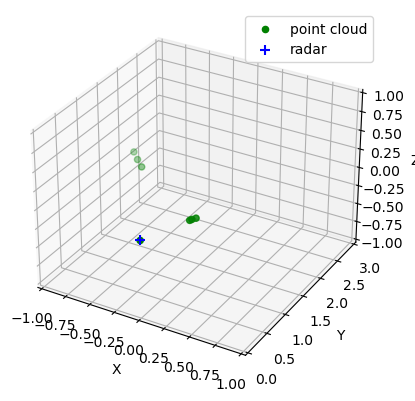

In [6]:
# # for creating a responsive plot
# %matplotlib inline

# target_frame = 0
# for i in range(len(output_dict)):
#     if "pointCloud" in output_dict[target_frame].keys():
#         break
#     target_frame+=1


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xyz = output_dict[target_frame]['pointCloud'][:,0:3]


# print(target_frame)
# print(xyz)

# # print(output_dict[target_frame]["pointCloud"]

# # xyz coordinate of detected points
# x =xyz[:,0]
# y =xyz[:,1]
# z =xyz[:,2]

# # xyz coordinate of radar
# radar_x = [0]
# radar_y = [0]
# radar_z = [0]

# ax.scatter(x, y, z, c='g', marker='o', label='point cloud')
# ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_xlim(-1,1)
# ax.set_ylim(0,3)
# ax.set_zlim(-1,1)

# ax.legend()
# plt.show()

### checkpoint 1 (4 points): visualize the point cloud data over time
We would like to see how the detected points move both spatially and in time.

- Put the corner reflectors in front of the radar and move it around.
- Use visualizer and record point cloud data
- Create a 3D plot of the point cloud data of the first frame and update it every 0.5 seconds to the next frame
- Show TA the output video and explain your corner reflector trajectory

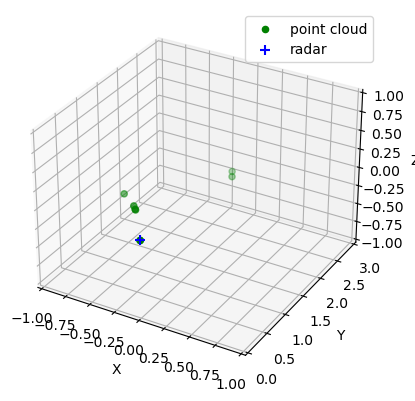

In [133]:
from IPython.display import display, clear_output
def pointCloud2video(pointCloud):
    for current_frame in range(len(pointCloud)):
        clear_output(wait=True)
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')  
        xyz = output_dict[current_frame]['pointCloud'][:,0:3]
        
        # xyz coordinate of detected points
        x =xyz[:,0]
        y =xyz[:,1]
        z =xyz[:,2]
        
        # xyz coordinate of radar
        radar_x = [0]
        radar_y = [0]
        radar_z = [0]
        
        ax.scatter(x, y, z, c='g', marker='o', label='point cloud')
        ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim(-1,1)
        ax.set_ylim(0,3)
        ax.set_zlim(-1,1)
        
        ax.legend()
        plt.show()

        time.sleep(.1)

# binDirPath = "C:\\Users\\tyler\\CS_437_EKS\\Prelab4\\Prelab_4_export (1)\\Industrial_Visualizer\\binData\\11_14_2023_14_59_16"
binDirPath = "C:\\Users\\tyler\\CS_437_EKS\\Prelab4\\Prelab_4_export (1)\\Industrial_Visualizer\\binData\\point_cloud_data"
output_dict = parse_ADC(binDirPath)

# pointCloud = output_dict[:]['pointCloud'][:,0:3]
# pointCloud = output_dict

pointCloud2video(output_dict)

## Exercise 2: Distinguishing objects in point cloud using k-means cluster

Next, we will use clustering algorithms to group the points related to individual objects. This feature is defined within radar and you can see the clustering and classification output using "TrackingClassification.cfg" file. Test the output of this cfg file while walking in front of radar. You will then design your own clustering using the code below.

### what is k-means?
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Running following block of code will show you a simple sample dataset and how k-means algorithm works to cluster the datasets.

In the plot below, the result from the k-mean algorithm is visualized using different colors for each cluster and the cluster center as a black circle.

As the plot shows, k-means algorithm can effectively assign the points to clusters.

(-1.0, 1.0)

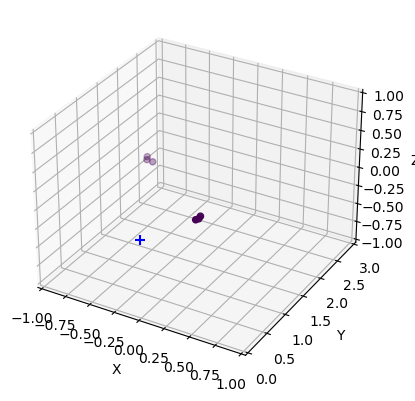

In [58]:

# # X, y_true = make_blobs(n_samples=300, centers=4,
# #                        cluster_std=0.60, random_state=0)

# # plt.scatter(X[:, 0], X[:, 1], s=15)


# # need to set the x,y,z coordinates per point 



    
# current_frame = 7
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  
# xyz = output_dict[current_frame]['pointCloud'][:,0:3]

# # # xyz coordinate of detected points
# x =xyz[:,0]
# y =xyz[:,1]
# z =xyz[:,2]

# # xyz coordinate of radar
# radar_x = [0]
# radar_y = [0]
# radar_z = [0]

# clf = Kmeans(k=2)
# labels, centroids = clf.predict(xyz)





# ax.scatter(x, y, z, c=labels, marker='o', label='point cloud')
# ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])
# # ax.scatter(x, y, z, c='g', marker='o', label='point cloud')
# # ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', alpha=0.5)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_xlim(-1,1)
# ax.set_ylim(0,3)
# ax.set_zlim(-1,1)

# # ax.legend()
# # plt.show()

# # plt.subplot(1,2,2)

# # clf = Kmeans(k=2)
# # labels, centroids = clf.predict(xyz)

# # print(labels)

# # plt.scatter(x,y,z, c=labels, cmap='viridis')
# # plt.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', alpha=0.5)
# # plt.show()





In [130]:
import math
def euclidean_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)
    
first_ref = []
second_ref = []
threshold = .1
weak_threshold = 0.01
for current_frame in range(len(output_dict)):
    
    xyz = output_dict[current_frame]['pointCloud'][:,0:3]
    
    # # xyz coordinate of detected points
    x =xyz[:,0]
    y =xyz[:,1]
    z =xyz[:,2]

    # clustering alg attempts to find 2 clusters
    clf = Kmeans(k=2)
    labels, centroids = clf.predict(xyz)

    # record the number of actually found clusters
    clusters_found = 0

    if math.isnan(centroids[0][0]) and math.isnan(centroids[1][0]):
        continue
    if math.isnan(centroids[0][0]) or math.isnan(centroids[1][0]):
        clusters_found = 1
    else:
        clusters_found = 2

    first_centroid = centroids[0]
    second_centroid = centroids[1]
    if clusters_found == 2 and len(first_ref) == 0 and len(second_ref) == 0:
        # initialize with the closest as the first reflector
        zero = [0,0,0]


        if euclidean_distance(zero, first_centroid) > euclidean_distance(zero, second_centroid):
            first_ref.append(second_centroid)
            second_ref.append(first_centroid)
        else:
            first_ref.append(first_centroid)
            second_ref.append(second_centroid)
        continue
        
    if clusters_found == 2: # find the current cluster that is closest to last recorded centroids and add to this

        # get the difference between the centroids and each of the previous reflector positions
        # ref_centroid
        first_first = euclidean_distance(first_ref[-1], first_centroid)
        first_second = euclidean_distance(first_ref[-1], second_centroid)
        second_first = euclidean_distance(second_ref[-1], first_centroid)
        second_second = euclidean_distance(second_ref[-1], second_centroid)
        first_centroid_loc = ""
        second_centroid_loc = ""
        # check which reflector the first centroid is closer to
        if first_first <= second_first:
            first_centroid_loc = "first"
        else:
            first_centroid_loc = "second"

        if first_second <= second_second:
            second_centroid_loc = "first"
        else:
            second_centroid_loc = "second"

        if first_centroid_loc == second_centroid_loc:
            # if both of the centroids are closer to a previously seen reflector then assign the closer one to the reflector 
            # and only assign the other point if it is within a threshold of other point\

            if first_centroid_loc == "first":
                if first_first <= second_first and first_first <= weak_threshold:
                    first_ref.append(first_centroid)

                    if second_first <= threshold:
                        second_ref.append(second_centroid)
                    else:
                        second_ref.append(second_ref[-1])
                elif first_first >= second_first and second_first <= weak_threshold:
                    second_ref.append(first_centroid)

                    if first_first <= threshold:
                        first_ref.append(second_centroid)
                    else:
                        first_ref.append(first_ref[-1])
                else:
                    first_ref.append(first_ref[-1])
                    second_ref.append(second_ref[-1])
                    

            else:
                if first_second <= second_second and first_second <= weak_threshold:
                    second_ref.append(first_centroid)

                    if first_second <= threshold:
                        first_ref.append(second_centroid)
                    else:
                        first_ref.append(first_ref[-1])
                elif first_second >= second_second and second_second <= weak_threshold:
                    first_ref.append(first_centroid)

                    if second_second <= threshold:
                        second_ref.append(second_centroid)
                    else:
                        second_ref.append(second_ref[-1])
                else:
                    first_ref.append(first_ref[-1])
                    second_ref.append(second_ref[-1])
                    
        else:

            if first_centroid_loc == "first":
                first_ref.append(first_centroid)
                second_ref.append(second_centroid)
            else:
                first_ref.append(second_centroid)
                second_ref.append(first_centroid)
        # check if the previous centroid recorded is closer to the first or second reflector
        # if euclidean_distance(first_ref[-1], first_centroid) <= euclidean_distance(second_ref[-1], first_centroid):
        #     first_ref.append(first_centroid)
        #     second_ref.append(second_centroid)
        # else:
        #     first_ref.append(second_centroid)
        #     second_ref.append(first_centroid)

    
    else: # assign the centroid to the closest recent centroid from either of the two lists
        centroid = 0
        # find the one that is not nan
        if math.isnan(first_centroid[0]):
            centroid = second_centroid
        else:
            centroid = first_centroid
    
        if euclidean_distance(first_ref[-1], centroid) <= euclidean_distance(second_ref[-1], centroid):
                first_ref.append(centroid)
                second_ref.append(second_ref[-1])
        else:
                second_ref.append(centroid)
                first_ref.append(first_ref[-1])

# print("first_ref:", first_ref)
# print("second_ref:", second_ref)
# print(len(first_ref))
# print(len(second_ref))




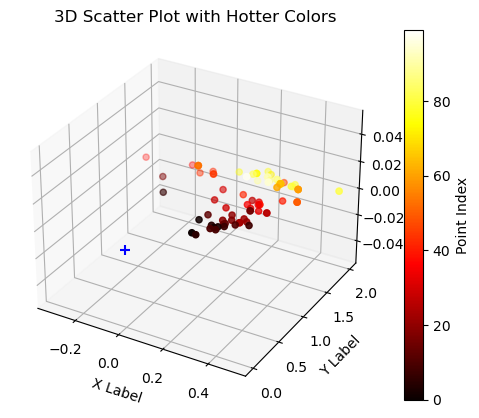

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
first_ref = np.array(first_ref)
# Create a hotter colormap

# print(first_ref)


hotter_cmap = plt.cm.hot

# Plot the 3D scatter plot with color based on point index
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(first_ref[:, 0], first_ref[:, 1], first_ref[:, 2], c=range(len(first_ref)), cmap=hotter_cmap, marker='o')
ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])

# Add colorbar to show the correspondence between color and point index
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Point Index')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('3D Scatter Plot with Hotter Colors')
plt.show()

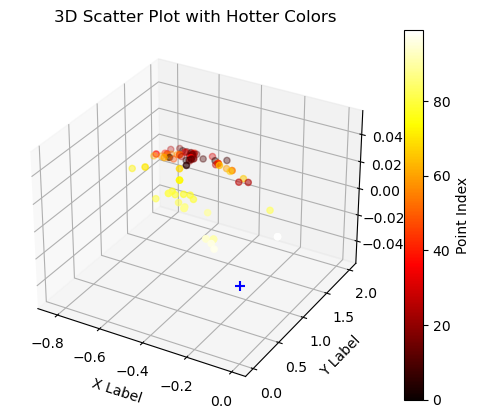

In [132]:
second_ref = np.array(second_ref)
# Create a hotter colormap
hotter_cmap = plt.cm.hot

# Plot the 3D scatter plot with color based on point index
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(second_ref[:, 0], second_ref[:, 1], second_ref[:, 2], c=range(len(second_ref)), cmap=hotter_cmap, marker='o')
ax.scatter(radar_x, radar_y, radar_z, c="b", marker='+', label='radar', s=[50])

# Add colorbar to show the correspondence between color and point index
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Point Index')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('3D Scatter Plot with Hotter Colors')
plt.show()



Next, we will apply this to our radar point cloud data to distinguish different number of objects detected by the radar.

### checkpoint 2 (3 points): distinguish two different objects using radar point cloud
- you and your teammate each take a corner reflector in your hand (while seeting 1m apart from each other). Then, record the point cloud information using radar while moving two corner reflectors in front of radar at a fixed direction
- parse the recorded binary file and extract point cloud data
- use k-mean algorithm and plot the clusters and estimate the center of the objects per frame
- call TAs to show your plot.

### checkpoint 3 (3 points):
- develop a tracking algorithm that tracks the movement of cluster centroids across frames.
- visualize the extracted cluster centroids over frames (one plot per corner reflector) as 3D scatter plots with each point showing the corner reflector location (x,y,z) at each frame. The plot should show the trajectory of the corner reflector.
-  Call the TA to show your movement and the output plot or submit a video on Canvas showing your movement and the output of parse data with the 3D corner reflectors' locations across frames.

### Extra Credit Checkpoint (3 points):  
Extend the above tracking system for two people instead of two corner reflectors and draw a bounding box around each detected cluster. Submit a video on Canvas to show your system in action. Doesn't have to be in real-time, you can record the data and show the movement, and then run your code and show the results.

[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2.88024255e+00  2

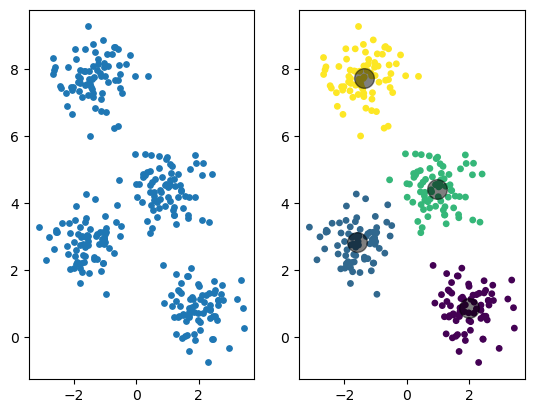

In [40]:
# plt.figure()
# plt.subplot(1,2,1)
# X, y_true = make_blobs(n_samples=300, centers=4,
#                        cluster_std=0.60, random_state=0)

# plt.scatter(X[:, 0], X[:, 1], s=15)

# print(X)

# plt.subplot(1,2,2)

# clf = Kmeans(k=4)
# labels, centroids = clf.predict(X)

# plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
# plt.show()


